   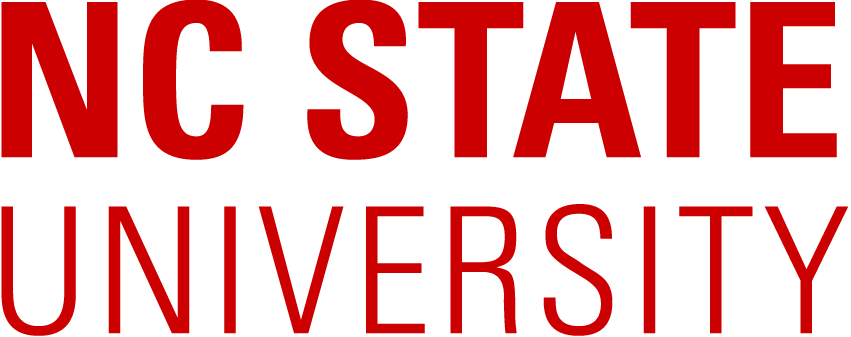 
   
   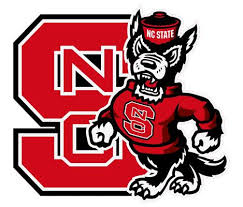
   
   <font color='Red'>CS590_Programming and Data Science for Applied Research

    
   <font color='Red'>Course Project</font>                                   
    
    'SOURCE' (unique)                                                                 
    
    Description: Simulation to visualize Mendelian sampling variation within Full-Sib Family, explore the IBD Count and IBD Proportion.
    
    ___AUTHORS___
    GS Martins <gsmarti2@ncsu.edu>
                                  
    Date: DEC 02 2019             
                                  
    Include: IBD Count, Proportion and Kinship Coefficient calculations
             Observed Cotterman's K values
             Observed Genetic Relantionship Matrix
                                                  
            ... diverse -- read comments          
                                                  
    
    Assumptions: Parents A and B are not related ( kinship = 0 ).
                 All genes are independent (Do not considers Linkage).
                                                                       
                                   (12)         (34)                   
                                     A --------- B                     
                                           |                           
                                           |                           
                                     C --------- D                     
                                                                       
                              25% - 13           31 - 25%              
                              25% - 14           32 - 25%             
                              25% - 23           41 - 25%             
                              25% - 24           42 - 25%             
    

In [10]:
#** Defining the size of the random population of i Full-Siblings with j Genes

n.sib<-35            #**<<<---- Indicate how many individuals ( suggested < 50 )            
n.Gene<-100        #**<<<---- Indicate how many Genes ( suggested < 10000 )

In [11]:
# Press ctrl + enter to 'Source' the script

















# The System Time function will report the time needed to run the entire script.
system.time({

# Clean the Console
cat("\014") 

# Limit the number of individuals and genes to save computing time.
if(n.Gene>10000
   ){
  n.Gene=10000
}

if(n.sib>200
   ){
  n.sib=200
}

# POP matrix with Genes on rows, and siblings on columns.
# The cell mean corresponds to the genotype of individual i for Gene j

# initial pop for vectorization
pop<-as.data.frame(matrix(1,1,1))
for( i in 1:n.sib ){
  for ( j in 1:n.Gene ){
  
  pop[j,i]<-sample(x = c("13",    # Genotypic classes
                         "14",
                         "23",
                         "24"
                         ),
                   prob = c(0.25, # Probabilities associated with each class
                            0.25,
                            0.25,
                            0.25),
                   size =1,
                   replace = T
                   )
  }
}

colnames(pop)<-c(1:n.sib)

# Creating all possible pairwise combination of n.sib individuals
pair<-t(combn(1:n.sib,2))


#### Calculating for each one of the possible pairs their average IBD proportion over 
#    all Genes

# Creating vectorized outputs
gr<-data.frame()
temp<-data.frame()
Gene<-character(nrow(pair)*n.sib)
Ind.1<-character(nrow(pair)*n.sib)
Ind.1.gt<-character(nrow(pair)*n.sib)
Ind.2<-character(nrow(pair)*n.sib)
Ind.2.gt<-character(nrow(pair)*n.sib)
IBD.count<-character(nrow(pair)*n.sib)
IBD.prop<-character(nrow(pair)*n.sib)
#kin<-character(nrow(pair)*n.sib)
all.data<-data.frame()

for (i in 1:nrow(pair)){
  for (j in 1:n.Gene){
    # Counting how many IBD allels for the row 'i' in 'pair'  
    temp[j,1]<-length(
      intersect(as.vector(strsplit(pop[j,pair[i,1]],""))[[1]],
                as.vector(strsplit(pop[j,pair[i,2]],""))[[1]]))
  }
  # Creating the Genetic Relantionship table (gr)
  gr[i,1]<-pair[i,1] # Assigning first indivudal index in column 1
  gr[i,2]<-pair[i,2] # Assigning second indivudal index in column 2
  gr[i,3]<-( mean(temp[,1]) / 2 ) # Assigning the IBD proportion for Gene j
  Gene[((n.Gene*i)-(n.Gene-1)):(n.Gene*i)]<-1:n.Gene
  Ind.1[((n.Gene*i)-(n.Gene-1)):(n.Gene*i)]<-pair[i,1]
  Ind.1.gt[((n.Gene*i)-(n.Gene-1)):(n.Gene*i)]<-pop[,pair[i,1]]
  Ind.2[((n.Gene*i)-(n.Gene-1)):(n.Gene*i)]<-pair[i,2]
  Ind.2.gt[((n.Gene*i)-(n.Gene-1)):(n.Gene*i)]<-pop[,pair[i,2]]
  IBD.count[((n.Gene*i)-(n.Gene-1)):(n.Gene*i)]<-temp[,1]
  IBD.prop[((n.Gene*i)-(n.Gene-1)):(n.Gene*i)]<-temp[,1]/2
}

all.data<-as.data.frame(cbind(Gene,
                              Ind.1,
                              Ind.1.gt,
                              Ind.2,
                              Ind.2.gt,
                              IBD.count,
                              IBD.prop
                              )
                        )

colnames(all.data)<-c('Gene',
                      'Ind.1',
                      'Ind.1.gt',
                      'Ind.2',
                      'Ind.2.gt',
                      "IBD Count",
                      "IBD Proportion"
                      )

colnames(gr)<-c('i',
                'j',
                "IBD Proportion"
                )


# Creating the Genetic Relantionship Matrix (converting table format from gr to a matrix)
grm<-as.data.frame(matrix(1,nrow = n.sib, ncol = n.sib))
colnames(grm)<-c(1:n.sib)
rownames(grm)<-c(1:n.sib)
for (row in 1:n.sib){
  for (col in 1:n.sib){
    cell.value<-which((gr[,1]==row) & (gr[,2]==col))
    if ( row == col ){
      grm[row,col]<-1
      next
    }
    else if ( length(cell.value)!=0 ) {
      grm[row,col]<-round(gr[cell.value,3],3)
    }
    else {
      cell.value<-which((gr[,1]==col) & (gr[,2]==row))
      grm[row,col]<-round(gr[cell.value,3],3)
    }
  }
}

cat("\n","\n");flush.console()
cat("Thanks for running this simulation. Let's see the results of our IBD analysis")
flush.console()
cat("\n","\n");flush.console()

# Observed Cotterman's K
print(paste("The observed",c(0:2),"IBD allele sharing proportion is",
      round(table(all.data$`IBD Count`)/length(all.data$`IBD Count`),3)));flush.console()


# Checking the population average IBD proportion and the range 
# REMEMBER!!! The expected IBD proportion for Full-Sib is 0.5
IBD.Proportion<-round(mean(gr[,3]),5)
IBD.Range<-round(range(gr[,3]),6)

cat("\n");flush.console()
print(paste("The observed average IBD Proportion is",IBD.Proportion));flush.console()
cat("\n");flush.console()
print(paste("The observed",c("min","max"),"IBD Proportion is",IBD.Range));flush.console()

cat("\n");flush.console()
cat("\n");flush.console()
cat("Remember to check the .csv files saved in your working directory!","\n")
flush.console()

cat("\n");flush.console()



#EXPORTING THE .CSV FILES

# Observed GRM
write.csv(grm,paste("4_GRMatrix - ",n.sib,"individuals -",n.Gene," genes.csv"))

# GR table
write.csv(gr,paste("3_Relationship Table - ",n.sib," individuals -",n.Gene," genes.csv"))

# Population genotypic data
write.csv(pop,paste("1_Population - ",n.sib," individuals -",n.Gene," genes.csv"))

# All data
write.csv(all.data,paste("2_Database - ",n.sib," individuals -",n.Gene," genes.csv"))




# Heatmap

library(ggplot2)

myplot<-ggplot(gr, aes(gr$i, gr$j, fill= gr$`IBD Proportion`))  +
ggtitle(paste("GRM Heatmap: # Individuals=",n.sib,"; # Genes=",n.Gene)) +
xlab("Full-sib Individuals") +
ylab("Full-sib Individuals") +
theme(legend.title = element_text(size = 30),
      legend.text = element_text(size=30),
      legend.key.size = unit(1, "cm") ,
      legend.key.height = unit(0.5, "cm"),
      plot.title = element_text(size=20, face="bold.italic"),
      axis.title.x = element_text(size=10, face="bold"),
      axis.title.y = element_text(size=10, face="bold"))+
geom_tile() +
scale_fill_gradient2(paste("IBD Proportion\n Avg",
                           round(IBD.Proportion,4),
                           "\n Min ",
                           round(min(gr$`IBD Proportion`),4),
                           "\n Max ",
                           round(max(gr$`IBD Proportion`),4)),
                     low = "navyblue", mid = "white", high = "navyblue", midpoint = 0.5,
                     limits=c(0.39,0.61),
                     guide = guide_legend(keywidth = unit(1, "cm"))
                     )

png(paste(getwd(),"/GRM Heatmap - ",n.sib," individuals -",n.Gene," genes.png",sep=""),
    width = 1080,
    height = 960)
print(myplot)
dev.off()
graphics.off()

cat("\n","\n","System time","\n")
print(myplot)
rm(list=ls())

})#End of system.time function


 
Thanks for running this simulation. Let's see the results of our IBD analysis
 
[1] "The observed 0 IBD allele sharing proportion is 0.25" 
[2] "The observed 1 IBD allele sharing proportion is 0.501"
[3] "The observed 2 IBD allele sharing proportion is 0.25" 

[1] "The observed average IBD Proportion is 0.49987"

[1] "The observed min IBD Proportion is 0.4" 
[2] "The observed max IBD Proportion is 0.64"


Remember to check the .csv files saved in your working directory! 


 
 System time 


   user  system elapsed 
   5.38    0.08    5.61 